In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv(r'DATA/Telco-Customer-Churn.csv')

In [43]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [45]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [46]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [47]:
corr_df = pd.get_dummies(df[['gender','SeniorCitizen', 'Partner', 'Dependents', 'PhoneService','OnlineSecurity','OnlineBackup', 'DeviceProtection','TechSupport','InternetService','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']]).corr()

In [48]:
corr_yes_churn = corr_df['Churn_Yes'].sort_values().iloc[1:-1]

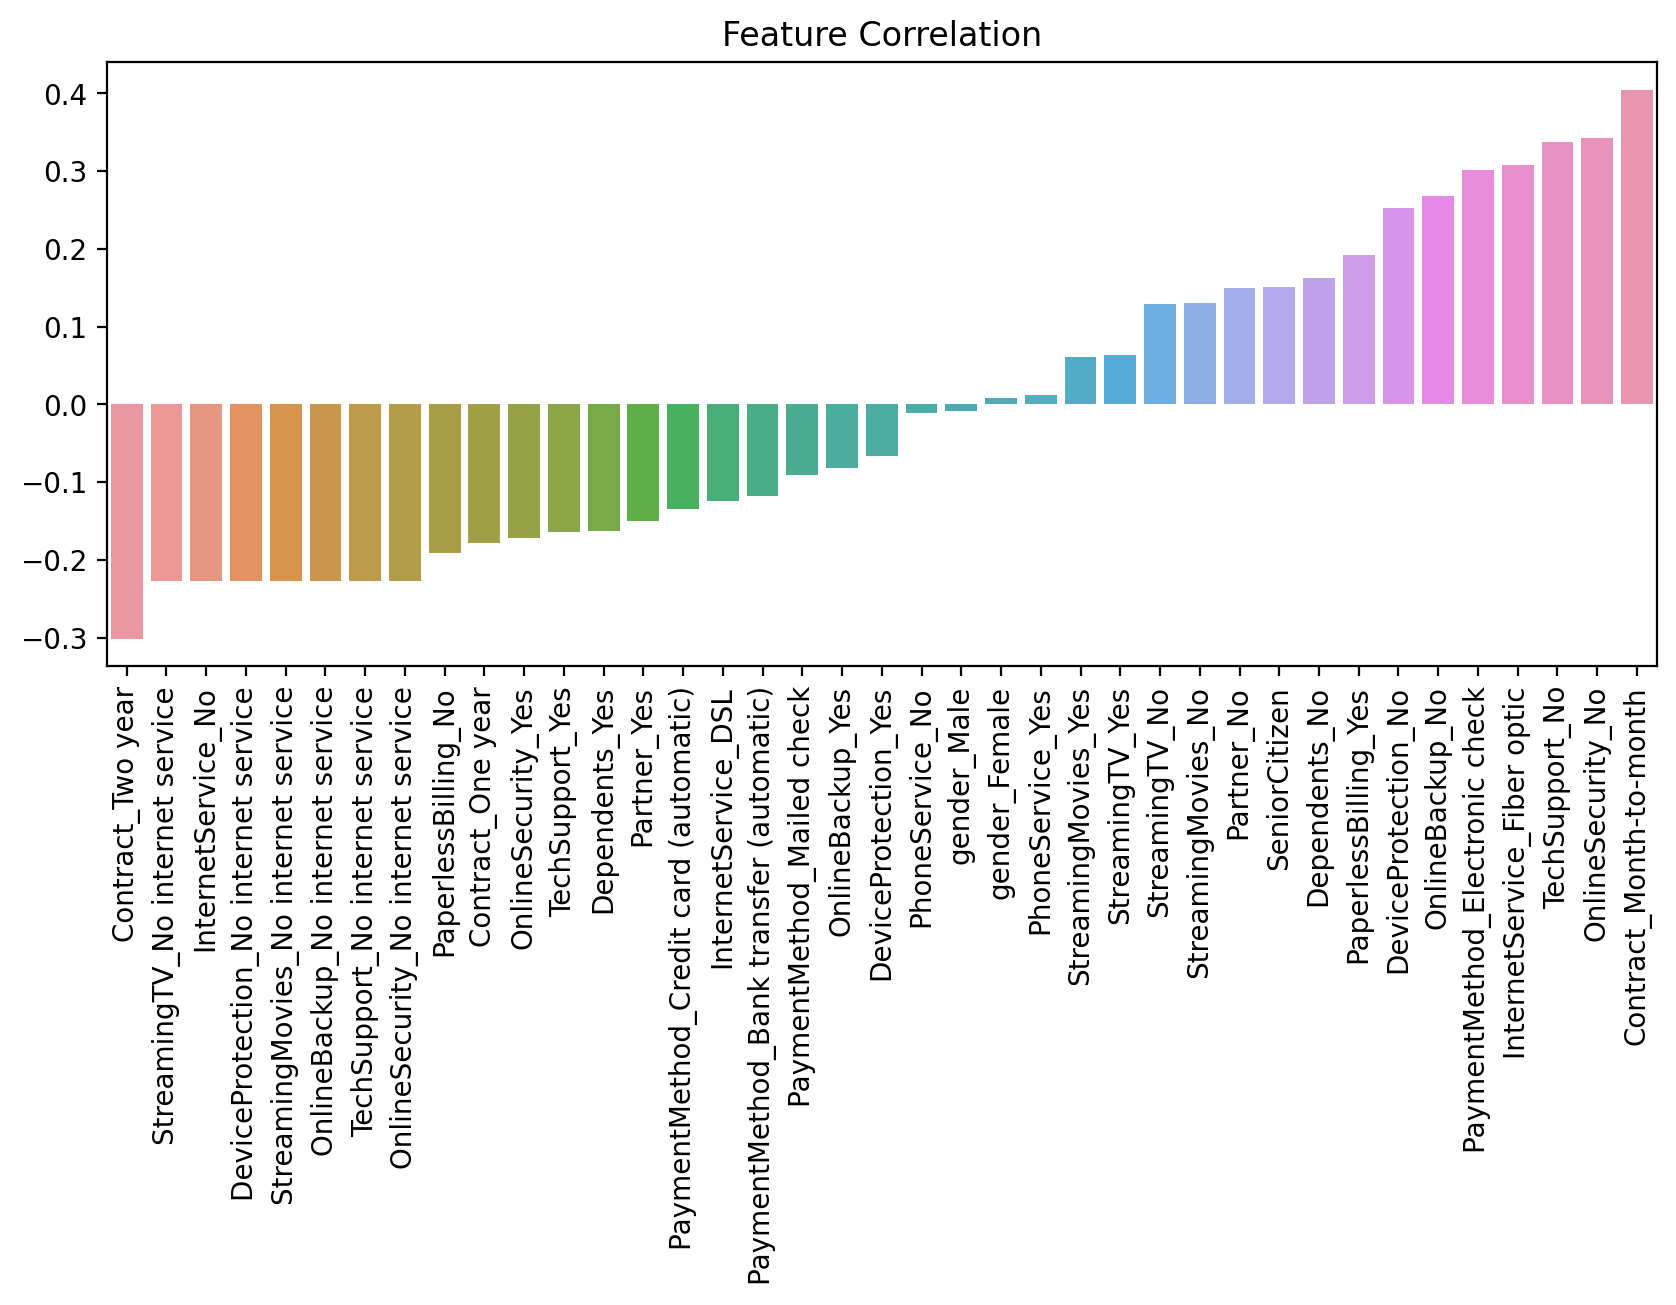

In [49]:
plt.figure(figsize=(10,4),dpi=200)
plt.title('Feature Correlation')
sns.barplot(x=corr_yes_churn.index,y=corr_yes_churn.values)
plt.xticks(rotation=90);

<AxesSubplot:xlabel='Churn', ylabel='count'>

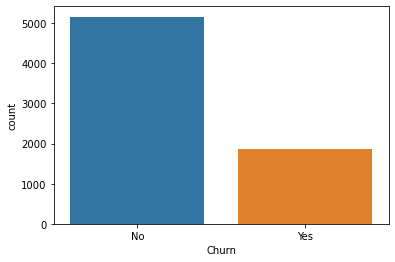

In [50]:
sns.countplot(data=df,x='Churn')

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

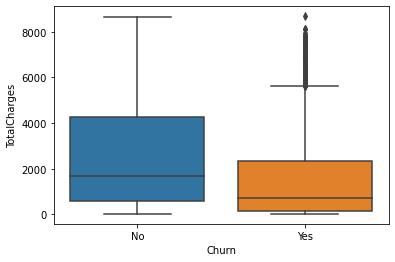

In [51]:
sns.boxplot(data=df,x='Churn',y='TotalCharges')

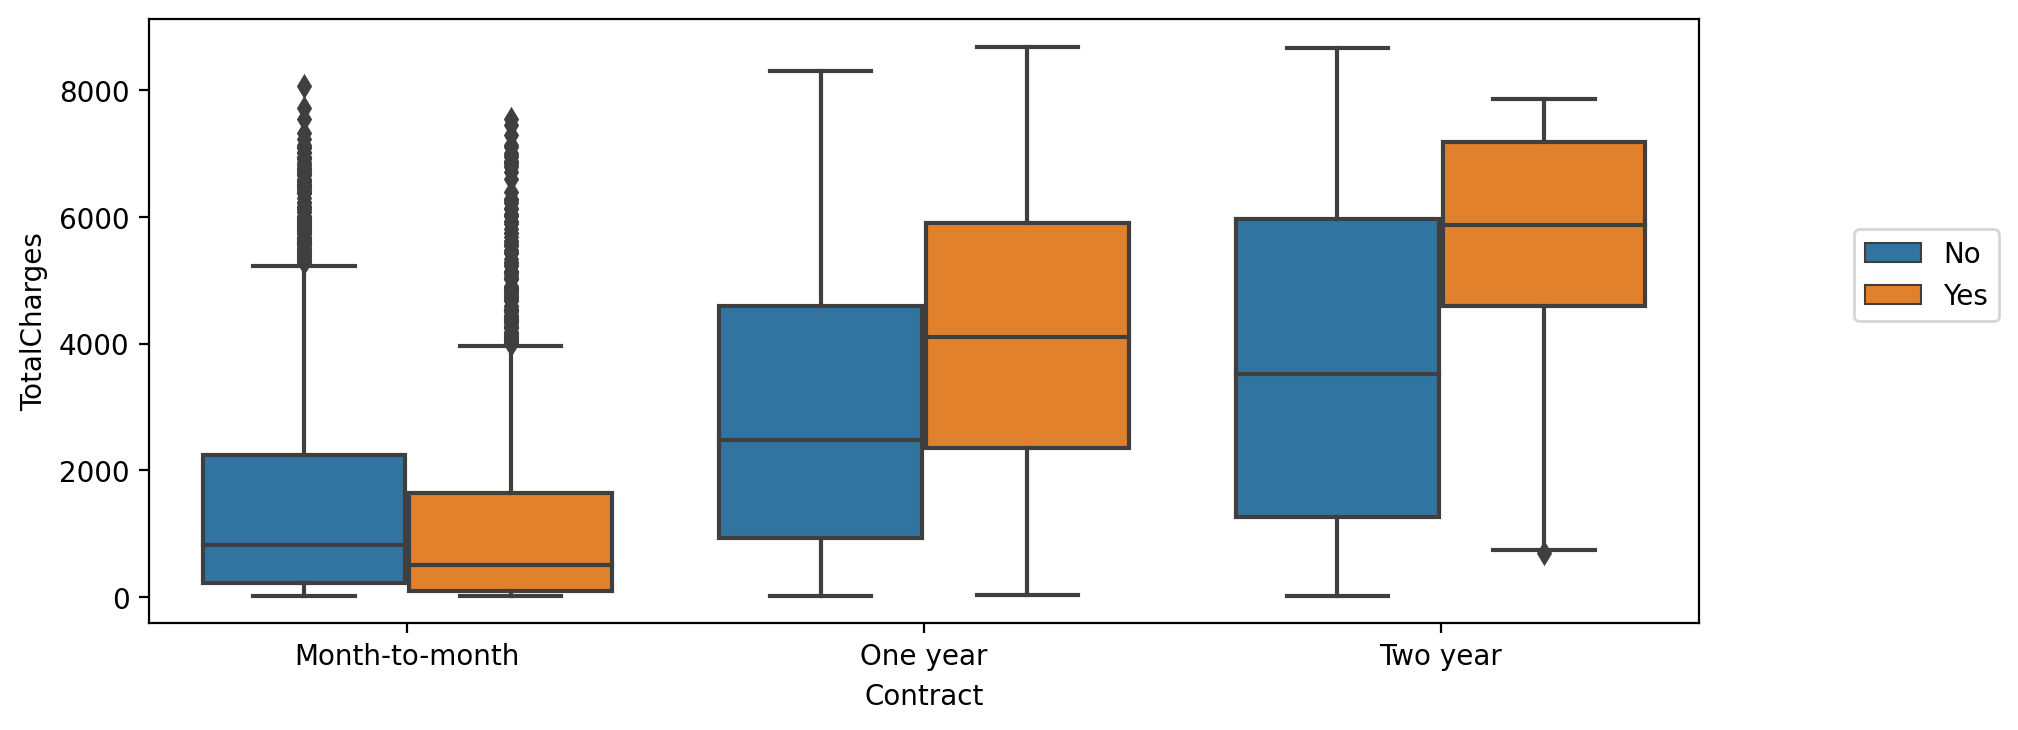

In [52]:
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df,y='TotalCharges',x='Contract',hue='Churn')
plt.legend(loc=(1.1,0.5))

### CHURN ANALYSIS

In [53]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39])

<AxesSubplot:xlabel='tenure', ylabel='Count'>

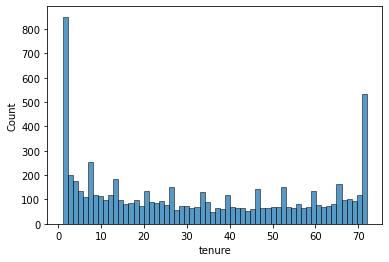

In [54]:
sns.histplot(data=df,x='tenure',bins=60)

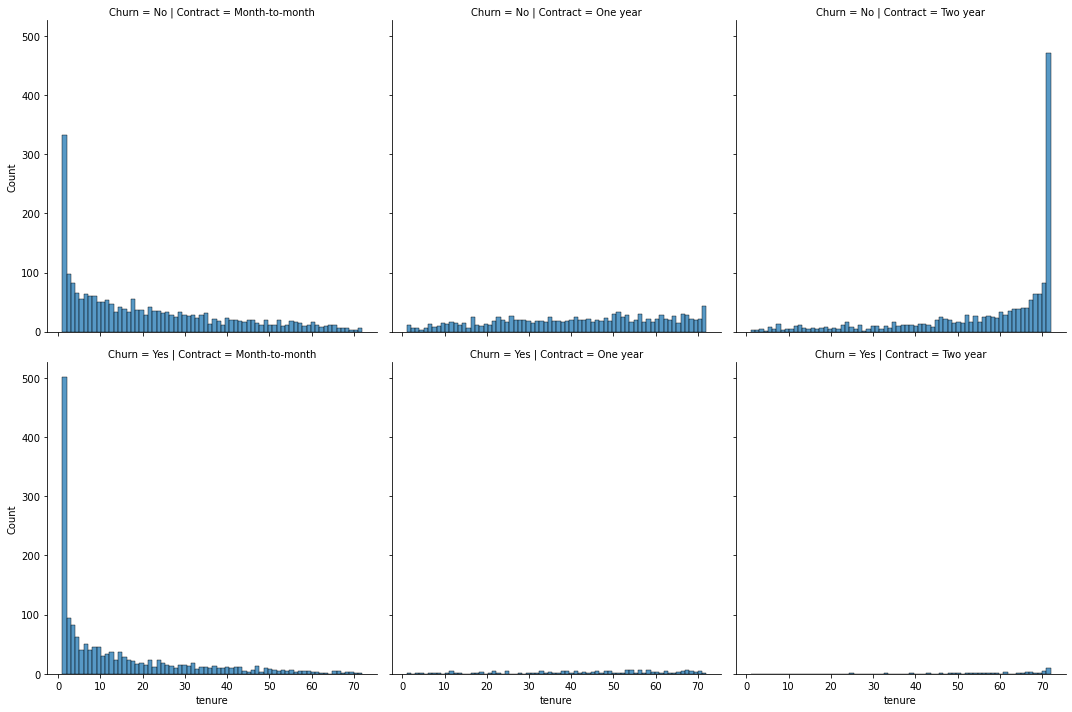

In [55]:
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn')

In [56]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,
                x='MonthlyCharges',
                y='TotalCharges',
                hue='Tenure Cohort',
               alpha=0.4,linewidth=0.3,palette='Dark2')

ValueError: Could not interpret value `Tenure Cohort` for parameter `hue`

<Figure size 2000x800 with 0 Axes>

In [ ]:
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [ ]:
no_churn = df.groupby(['Churn', 'tenure']).count().transpose()['No']

In [ ]:
churn_rate = 100*yes_churn/(no_churn+yes_churn)

In [ ]:
churn_rate.transpose()['customerID'].plot()

In [ ]:
def cohort(tenure):
    if tenure<13:
        return '0-12 Months'
    elif tenure<25:
        return '12-24 Months'
    elif tenure<49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [ ]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [ ]:
df[['Tenure Cohort','tenure']]

In [ ]:
sns.countplot(data=df,x='Tenure Cohort',hue='Churn')

In [ ]:
sns.catplot(data=df,x='Tenure Cohort',hue='Churn',kind='count',col='Contract')

### SINGLE DECISION TREE

In [60]:
X = df.drop(['Churn','customerID'],axis=1)

In [61]:
X = pd.get_dummies(X,drop_first=True)
y = df['Churn']

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.1,random_state=101)

In [63]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [64]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [65]:
preds = dt.predict(X_test)

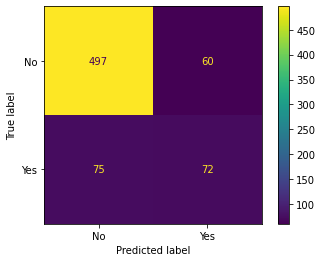

In [66]:
plot_confusion_matrix(dt,X_test,y_test)

In [72]:
imp_feats = pd.DataFrame(data=dt.feature_importances_, index=X.columns, columns=['Feat Imp']).sort_values('Feat Imp')

In [76]:
imp_feats = imp_feats[imp_feats['Feat Imp']!=0]

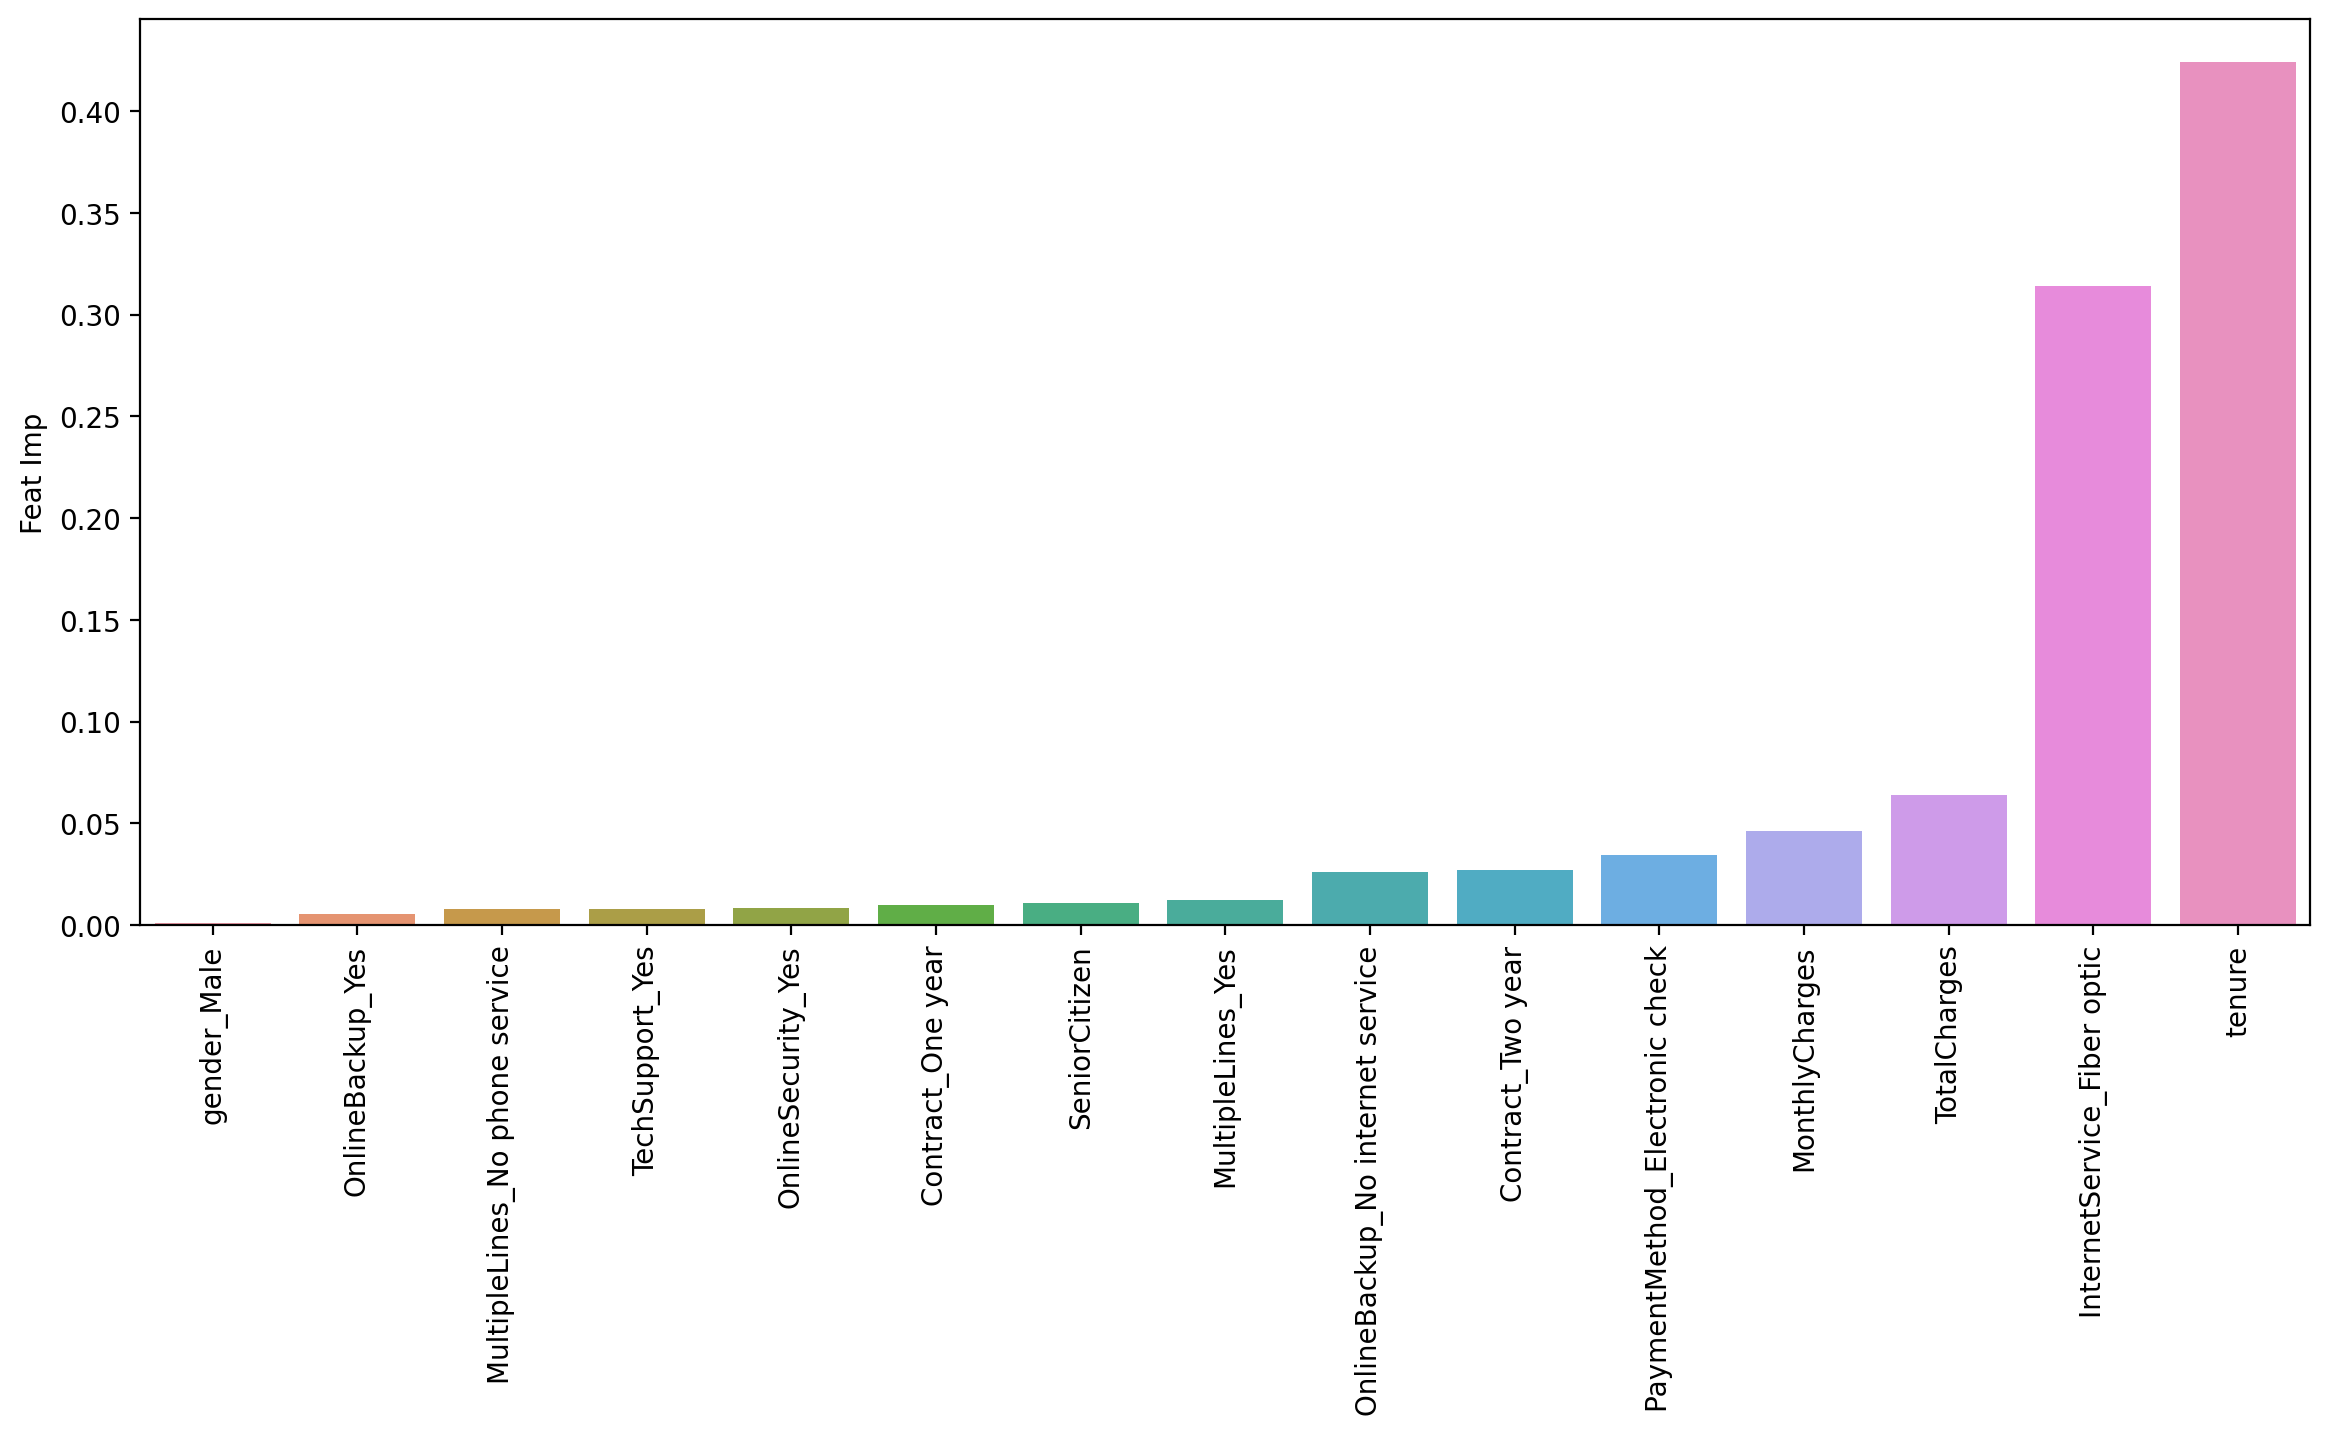

In [79]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats,x=imp_feats.index,y='Feat Imp')
plt.xticks(rotation=90);

In [80]:
from sklearn.tree import plot_tree

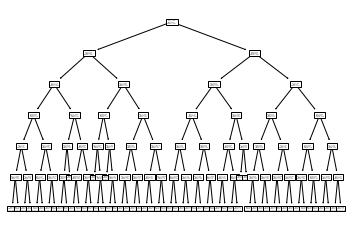

In [82]:
plot_tree(dt);

### RANDOM FOREST

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rf = RandomForestClassifier(max_depth=6)

In [89]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6)

In [90]:
preds = rf.predict(X_test)

In [91]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.87      0.92      0.89       557
         Yes       0.61      0.46      0.53       147

    accuracy                           0.83       704
   macro avg       0.74      0.69      0.71       704
weighted avg       0.81      0.83      0.82       704



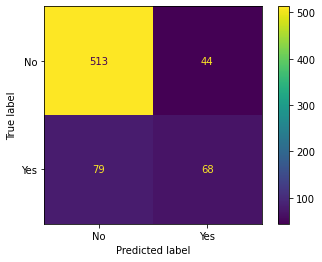

In [92]:
plot_confusion_matrix(rf,X_test,y_test)

### BOOSTED TREES

In [93]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

In [94]:
ada_model = AdaBoostClassifier()
gb_model = GradientBoostingClassifier()

In [95]:
ada_model.fit(X_train,y_train)

AdaBoostClassifier()

In [96]:
gb_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [97]:
ada_preds = ada_model.predict(X_test)

In [101]:
gb_preds = gb_model.predict(X_test)

In [100]:
print(classification_report(y_test,ada_preds))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



In [102]:
print(classification_report(y_test,gb_preds))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



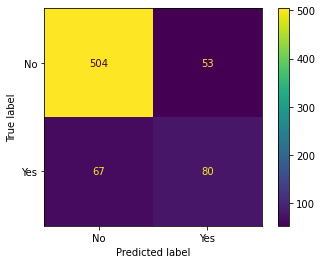

In [103]:
plot_confusion_matrix(ada_model,X_test,y_test)